In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

In [2]:
data = pd.read_csv("diamonds.csv")
backUp_data = data.copy()

In [3]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [9]:
#Viewing the levels of a categorical variable
categorical_features = ['cut', 'color', 'clarity']
for value in categorical_features:
    print(value,': ', (data[value].unique()))

cut :  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color :  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity :  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [10]:
print('Features: ', data.columns.tolist())

Features:  ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

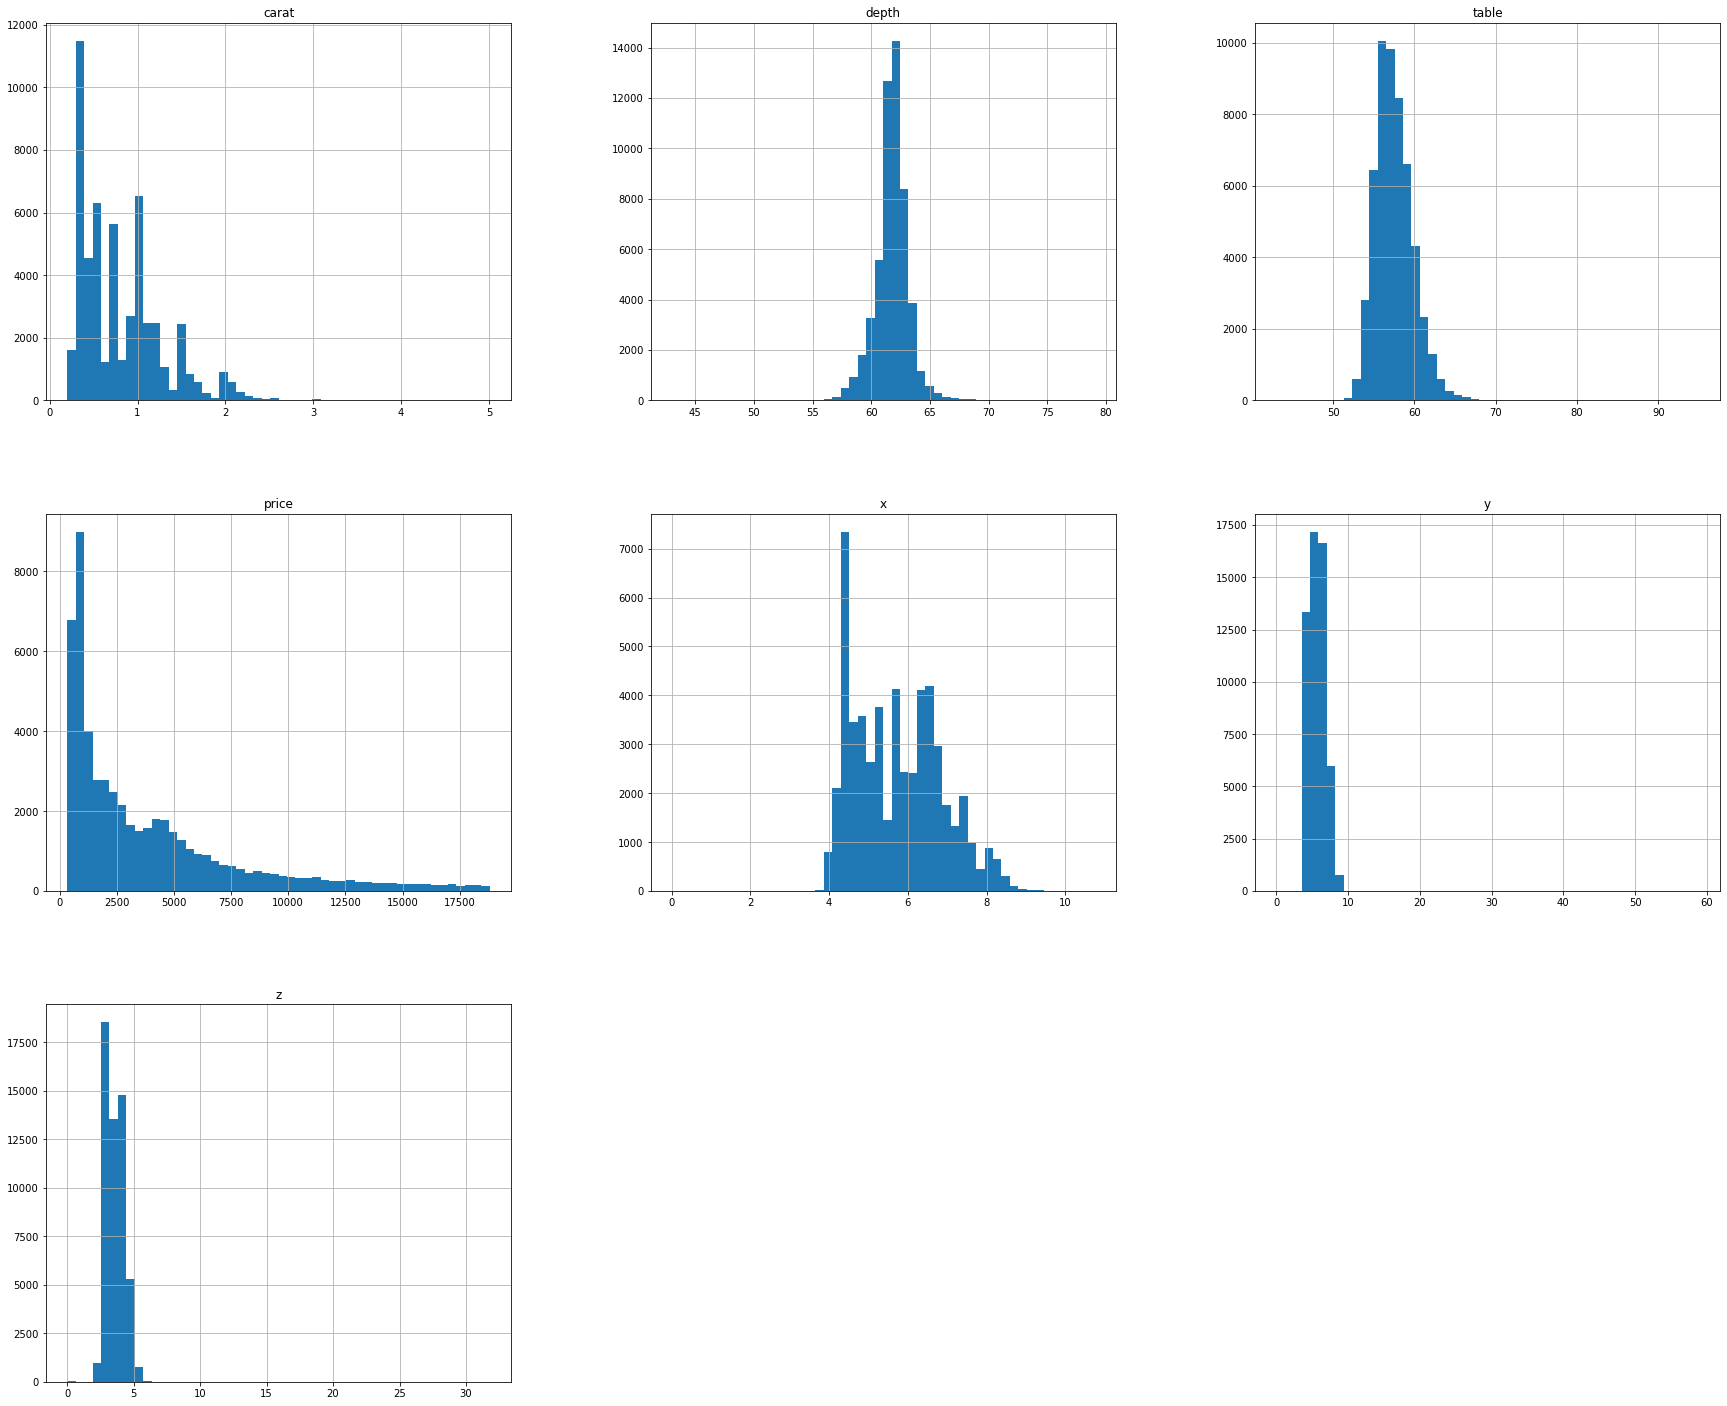

In [11]:
# visualize continuous features
data.drop(['cut', 'color', 'clarity'], axis=1).hist(bins=50, figsize=(30, 25))

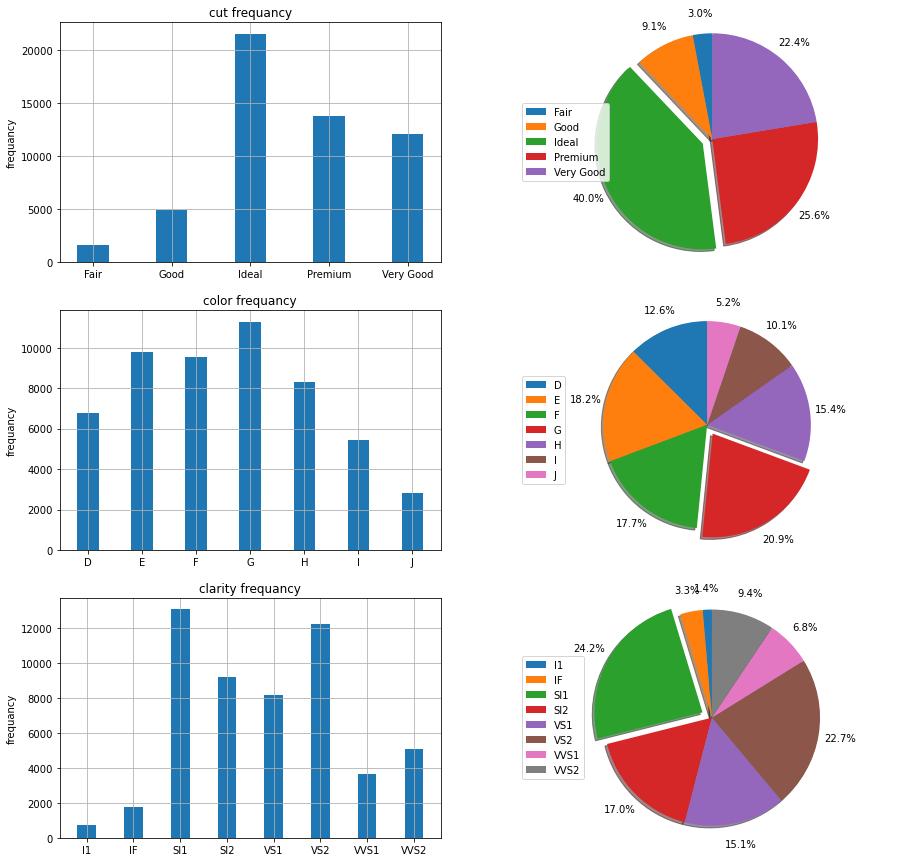

In [12]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
explode = (0, 0.1, 0, 0)
for count, value in enumerate(categorical_features):
    freq_table = pd.crosstab(index=data[value], columns='frequancy')
    # visualize bar_plot
    ax[count, 0].bar(freq_table.index.tolist(), freq_table['frequancy'],  width=0.4)
    ax[count, 0].grid()
    ax[count, 0].set_title(str(value)+' frequancy')
    ax[count, 0].set_ylabel('frequancy')
    # visualize pie_plot
    sizes = np.array(freq_table['frequancy'].values.tolist())
    sizes = (sizes/len(data))*100
    max_val = max(sizes)
    max_index = np.where(sizes == max_val)
    explode = tuple([0 if i!=max_index[0][0] else 0.1 for i in range(len(sizes))])
    ax[count, 1].pie(sizes, explode=explode, labels=None, pctdistance=1.2, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[count, 1].legend(labels=freq_table['frequancy'].index, loc=6)
    ax[count, 1].axis('equal')

In [13]:
print(data.isna().sum())
print('=====================================')
print((data == 0.0).sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64


In [14]:
data[(data.x == 0)| (data.y == 0) | (data.z == 0)][['x', 'y', 'z']]

,x,y,z
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [15]:
print('Total ZEROS: ', len(data[(data.x == 0)| (data.y == 0) | (data.z == 0)]))
trash_data = data[(data.x == 0)| (data.y == 0) | (data.z == 0)][['x', 'y', 'z']].index.tolist()
print('Trash data: ', trash_data)
data.drop(trash_data, inplace=True)
print((data == 0.0).sum()[['x', 'y', 'z']])

Total ZEROS:  20
Trash data:  [2207, 2314, 4791, 5471, 10167, 11182, 11963, 13601, 15951, 24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556, 49557, 51506]
x    0
y    0
z    0
dtype: int64


In [16]:
data.shape

(53920, 10)

In [17]:
numerical_features = ['carat', 'depth', 'table', 'price','x', 'y', 'z']

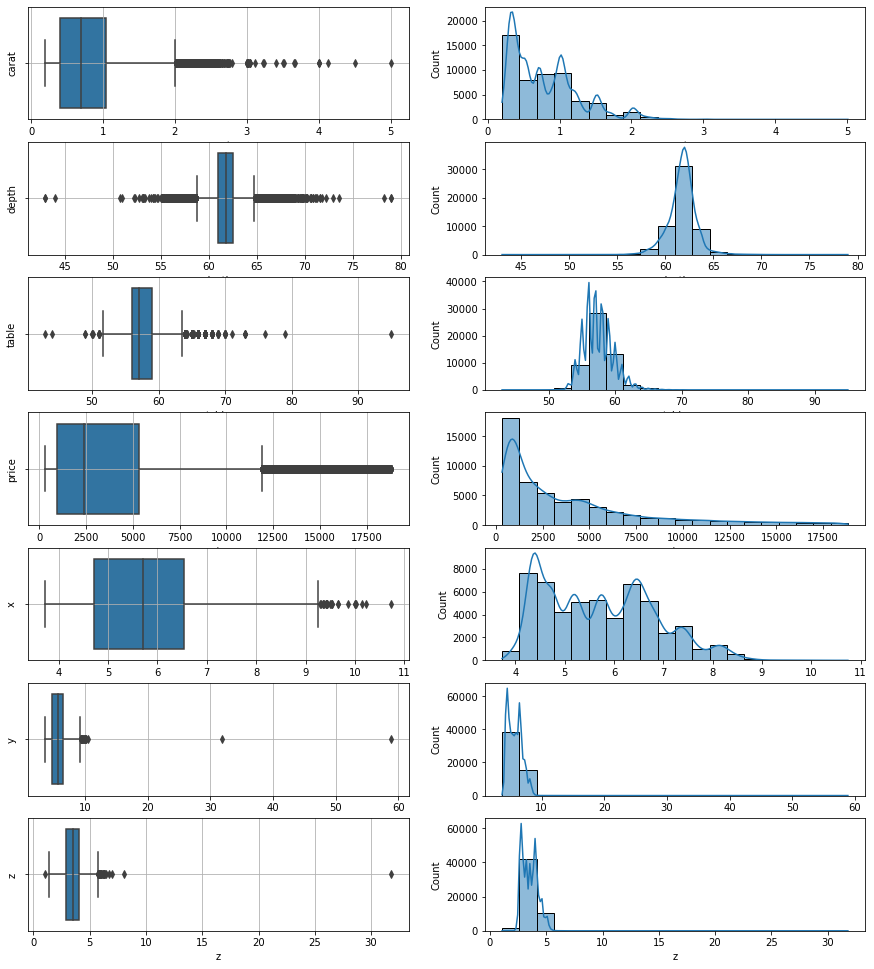

In [18]:
fig, ax = plt.subplots(7,2, figsize=(15,17))
for count1, value in enumerate(numerical_features):
    # visulaize box plot
    sns.boxplot(data=data, x=data[value], ax=ax[count1, 0])
    ax[count1, 0].set_ylabel(str(value))
    ax[count1, 0].grid()
    # visulaize histogram plot
    bins = len(data[value].unique())//2
    sns.histplot(data=data, x=data[value], bins=20, kde=True, ax=ax[count1, 1])

In [19]:
def detect_outLier_features(df):
    for feature in numerical_features:
        q1 = np.quantile(df[feature], 0.25, interpolation='midpoint')
        q3 = np.quantile(df[feature], 0.75, interpolation='midpoint')
        IQR = q3 - q1
        upper_outlier = q3 + (1.5 * IQR)
        lower_outlier = q1 - (1.5 * IQR)
        print(str(feature)+' IQR :', IQR)
        print(str(feature)+' Upper Outlier :', upper_outlier)
        print(str(feature)+' Lower Outlier :', lower_outlier)
        print('==============================================')
detect_outLier_features(data)

carat IQR : 0.64
carat Upper Outlier : 2.0
carat Lower Outlier : -0.5599999999999999
depth IQR : 1.5
depth Upper Outlier : 64.75
depth Lower Outlier : 58.75
table IQR : 3.0
table Upper Outlier : 63.5
table Lower Outlier : 51.5
price IQR : 4374.5
price Upper Outlier : 11885.25
price Lower Outlier : -5612.75
x IQR : 1.83
x Upper Outlier : 9.285
x Lower Outlier : 1.9649999999999999
y IQR : 1.8200000000000003
y Upper Outlier : 9.27
y Lower Outlier : 1.9899999999999993
z IQR : 1.13
z Upper Outlier : 5.734999999999999
z Lower Outlier : 1.2150000000000003


In [20]:
def detect_outLier_df(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  new_df = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return new_df

In [21]:
sub_data = data[numerical_features]
print(sub_data.shape)
sub_data.head(5)

(53920, 7)


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
new_df = detect_outLier_df(sub_data)
print(sum(new_df.isnull().sum().tolist()))

8637


In [23]:
attrib = list(sub_data)
def remove_outLier_from_data(df):
  for i in attrib:
    df_outlier_removed = detect_outLier_df(df[i])
    df_outlier_removed = pd.DataFrame(df_outlier_removed)
    ind_diff=df.index.difference(df_outlier_removed.index)
    print(i, ': ', len(ind_diff))
    for j in range(0, len(ind_diff), 1):
      final_df = df.drop([ind_diff[j]])
      df = final_df
  return df

In [24]:
# Data without the outliers
data = remove_outLier_from_data(data)

carat :  1883
depth :  2794
table :  342
price :  2368
x :  0
y :  1
z :  2


In [25]:
print(data.shape)
data.isnull().sum()

(46530, 10)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


Ideal        20094
Premium      11748
Very Good    10744
Good          3677
Fair           267
Name: cut, dtype: int64
         cut   price
2      Ideal  1659.0
4  Very Good  2361.0
3    Premium  2475.0
1       Good  2591.0
0       Fair  3164.0


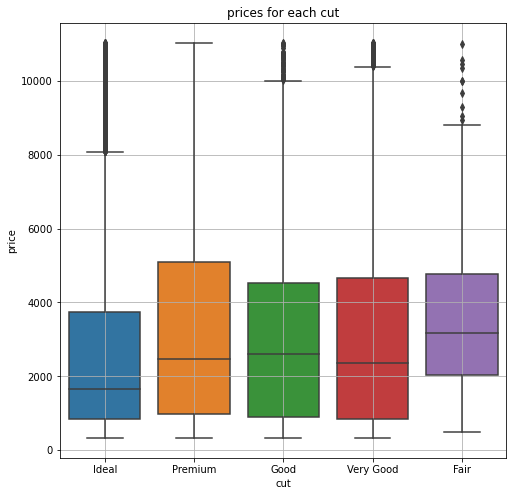

In [27]:
print(data['cut'].value_counts())
print('=============================')
print(data[['cut', 'price']].groupby(['cut'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.cut, y=data.price, ax=ax)
ax.set_title('prices for each cut')
ax.grid()

SI1     11270
VS2     10717
VS1      7253
SI2      7241
VVS2     4572
VVS1     3393
IF       1618
I1        466
Name: clarity, dtype: int64
  clarity   price
1      IF  1044.0
6    VVS1  1057.0
7    VVS2  1178.5
5     VS2  1792.0
4     VS1  1815.0
2     SI1  2499.5
0      I1  3204.0
3     SI2  3792.0


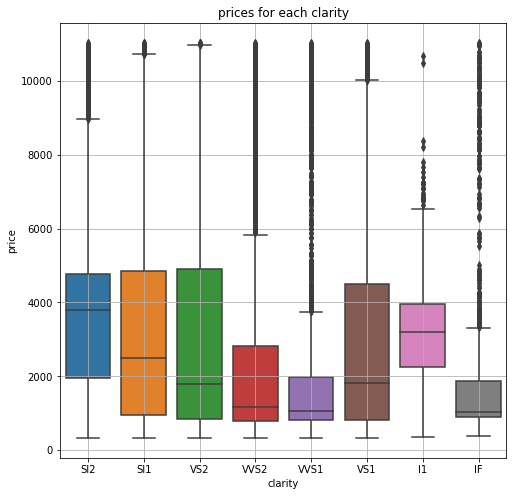

In [28]:
print(data['clarity'].value_counts())
print('=============================')
print(data[['clarity', 'price']].groupby(['clarity'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.clarity, y=data.price, ax=ax)
ax.set_title('prices for each clarity')
ax.grid()

G    9868
E    8740
F    8288
H    6983
D    6070
I    4378
J    2203
Name: color, dtype: int64
  color   price
1     E  1625.0
0     D  1710.0
3     G  1902.0
2     F  2088.0
4     H  2616.0
5     I  2688.0
6     J  3643.0


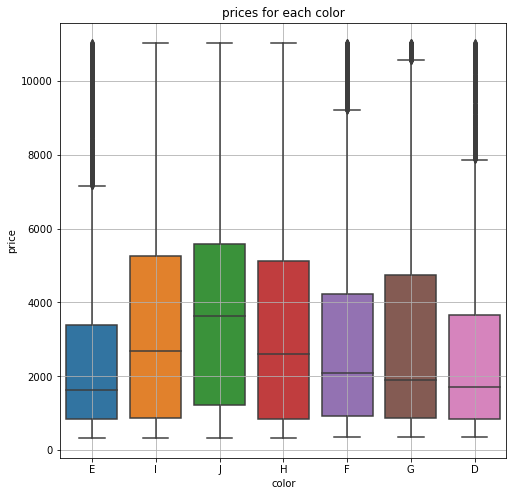

In [29]:
print(data['color'].value_counts())
print('=============================')
print(data[['color', 'price']].groupby(['color'], as_index=False).median().sort_values(by='price'))
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data, x=data.color, y=data.price, ax=ax)
ax.set_title('prices for each color')
ax.grid()

<AxesSubplot:>

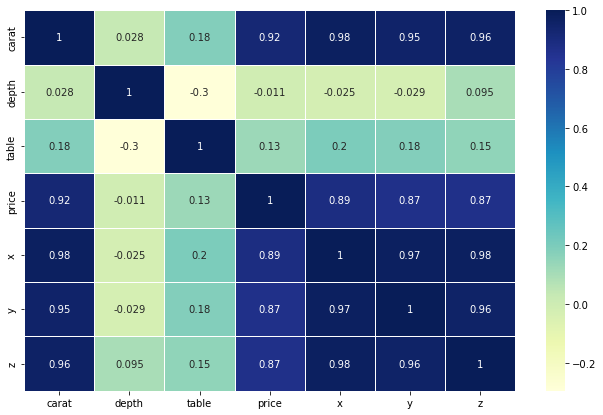

In [30]:
data_corr = sub_data.corr()
f, ax = plt.subplots(figsize=(11,7))
sns.heatmap(data_corr, annot=True, linewidths=0.5, ax=ax, cmap="YlGnBu")

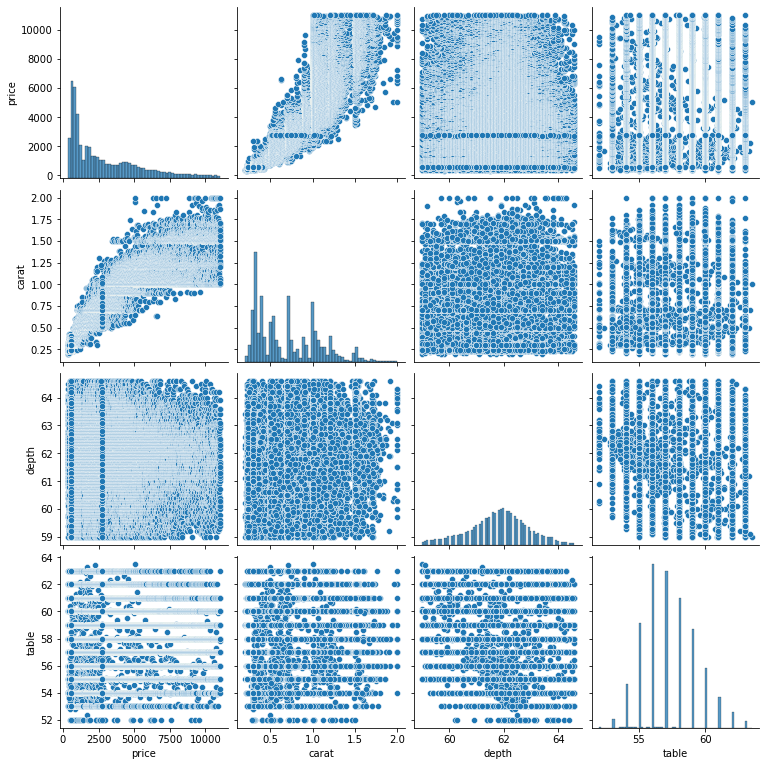

In [31]:
sns.pairplot(data=data, vars = ['price', 'carat', 'depth', 'table'], height=2.7)

<AxesSubplot:xlabel='price', ylabel='carat'>

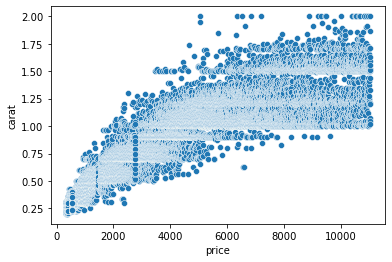

In [32]:
sns.scatterplot(data=data, x=data.price, y=data.carat)

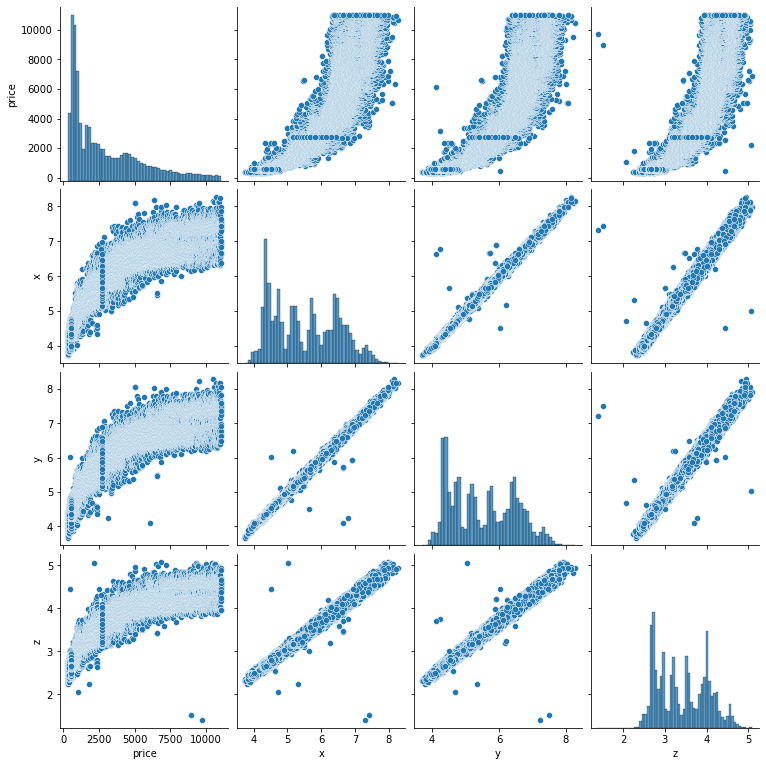

In [33]:
sns.pairplot(data=data, vars = ['price', 'x', 'y', 'z'], height=2.7)

In [34]:
data['volume'] = data['x'] * data['y'] * data['z']
data_corr = data.corr()
data_corr['price'].sort_values(ascending=False)

price     1.000000
volume    0.925930
carat     0.924802
y         0.905093
x         0.904048
z         0.900919
table     0.140881
depth     0.014071
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='volume'>

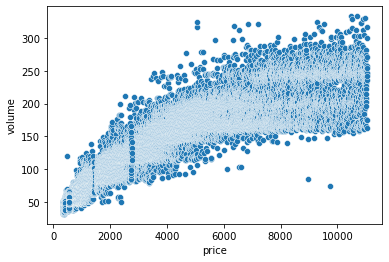

In [35]:
sns.scatterplot(data=data, x=data.price, y=data.volume)

In [36]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,random_state=42, test_size=0.2)

In [37]:

target = train_set['price'].copy()
data = train_set.drop('price', axis=1)

In [38]:
from sklearn.preprocessing import OrdinalEncoder
diamond_cat = data[['cut', 'color', 'clarity']]
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                               ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(diamond_cat)
diamond_cat_encoded[:10]

array([[3., 5., 2.],
       [4., 3., 3.],
       [3., 1., 3.],
       [2., 3., 3.],
       [2., 5., 6.],
       [3., 5., 3.],
       [4., 3., 6.],
       [4., 6., 2.],
       [4., 3., 3.],
       [3., 6., 2.]])

In [39]:
cat_df = pd.DataFrame(diamond_cat_encoded, columns=['cut', 'color', 'clarity'])
cat_df

,cut,color,clarity
0,3.0,5.0,2.0
1,4.0,3.0,3.0
2,3.0,1.0,3.0
3,2.0,3.0,3.0
4,2.0,5.0,6.0
...,...,...,...
37219,1.0,5.0,7.0
37220,2.0,5.0,3.0
37221,4.0,4.0,4.0
37222,4.0,4.0,2.0


In [40]:
price_df = pd.DataFrame(target, columns=['price'])
price_df = price_df.reset_index()
price_df.drop('index', axis=1, inplace=True)
price_df

,price
0,596
1,2586
2,5889
3,579
4,530
...,...
37219,597
37220,2443
37221,1630
37222,2890


In [41]:
cat_price_df = cat_df.merge(price_df, how = 'left', left_index = True, right_index=True)
cat_price_df.isna().sum()

cut        0
color      0
clarity    0
price      0
dtype: int64

In [42]:
data_corr = cat_price_df.corr()
data_corr['price']

cut       -0.074571
color     -0.147177
clarity   -0.160926
price      1.000000
Name: price, dtype: float64

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
class Volume(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        volume = X['x'] * X['y'] * X['z']
        return np.c_[X, volume]

In [44]:
vul_com = Volume()
vul_values = vul_com.transform(data)
vul_values.shape

(37224, 11)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [46]:
data = train_set.drop('price', axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,volume
11705,0.34,Premium,E,SI1,59.3,58.0,4.55,4.59,2.71,56.596995
52900,0.73,Ideal,G,VS2,62.5,56.0,5.78,5.74,3.60,119.437920
14596,1.24,Premium,I,VS2,60.1,59.0,7.02,6.95,4.20,204.913800
7064,0.33,Very Good,G,VS2,59.3,61.0,4.49,4.51,2.67,54.067233
47336,0.23,Very Good,E,VVS1,61.4,59.0,3.93,3.99,2.43,38.104101


In [47]:
numerical_data = data.drop(['cut', 'color', 'clarity'], axis=1)
categorical_data = data[['cut', 'color', 'clarity']].copy()

In [48]:
num_dimension = list(numerical_data)
num_dimension

['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [49]:
num_attribs = list(numerical_data)
cat_attribs = list(categorical_data)
numerical_pip = Pipeline([('volume', Volume()),('Standard', StandardScaler())])
full_pipeline = ColumnTransformer([('numerical', numerical_pip, num_attribs), ('categrical', OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                               ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), cat_attribs)])
final_data = full_pipeline.fit_transform(data)

In [50]:
final_data

array([[-0.9895729 , -2.32676619,  0.37964748, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.0878941 ,  0.64496095, -0.61316549, ...,  4.        ,
         3.        ,  3.        ],
       [ 1.49688941, -1.5838344 ,  0.87605396, ...,  3.        ,
         1.        ,  3.        ],
       ...,
       [-0.46465308, -0.09797084, -0.61316549, ...,  4.        ,
         4.        ,  4.        ],
       [ 0.28128561,  0.55209447, -0.11675901, ...,  4.        ,
         4.        ,  2.        ],
       [ 1.41400734,  0.18062858, -0.61316549, ...,  4.        ,
         5.        ,  2.        ]])

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(final_data, target)
lin_pre = lin_reg.predict(final_data)
print('linear regression predictions: ', lin_pre)

linear regression predictions:  [ 290.77841443 2958.97600224 6629.53125617 ... 2125.50177941 3270.98296597
 6784.78901446]


In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
lin_mse = mean_squared_error(target, lin_pre)
lin_rmse = np.sqrt(lin_mse)
print('RMSE for linear predictions: ', lin_rmse)

RMSE for linear predictions:  753.7178341219796


In [55]:
from sklearn.model_selection import cross_val_score
lin_sco_mse = cross_val_score(lin_reg, final_data, target, scoring='neg_mean_squared_error', cv=10)
lin_sco_rmse = np.sqrt(-lin_sco_mse)

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_sco_rmse)

Scores: [756.69025308 734.49181999 754.6071145  729.20348875 740.2635557
 767.78816107 741.72756829 799.70071953 760.99653836 755.36148339]
Mean: 754.0830702665419
Standard deviation: 19.161810770717047


In [57]:
from sklearn.tree import DecisionTreeRegressor 

In [58]:
d_tree = DecisionTreeRegressor()
d_tree.fit(final_data, target)
d_predict = d_tree.predict(final_data)
print('Decision Tree predictions: ', d_predict)

Decision Tree predictions:  [ 596. 2586. 5889. ... 1630. 2890. 6887.]


In [59]:
des_mse = mean_squared_error(target, d_predict)
des_rmse = np.sqrt(des_mse)
print('RMSE for Decision Tree predictions: ', des_rmse)

RMSE for Decision Tree predictions:  7.273966035297137


In [60]:
d_cross_mse = cross_val_score(d_tree, final_data, target, scoring='neg_mean_squared_error', cv=10)
d_cross_rmse = np.sqrt(-d_cross_mse)
display_scores(d_cross_rmse)

Scores: [496.9516713  470.69387791 466.28681946 457.53334048 468.57791794
 493.45006422 446.57898679 482.30541419 498.39381485 460.93578565]
Mean: 474.17076927900325
Standard deviation: 16.918598667294


In [61]:
from sklearn.ensemble import RandomForestRegressor
ranF = RandomForestRegressor()
ranF.fit(final_data, target)
ranF_predict = ranF.predict(final_data)
print('Random Forest predictions: ', ranF_predict)

Random Forest predictions:  [ 614.31 2619.3  5971.22 ... 1745.5  2891.01 6964.99]


In [62]:
ran_mse = mean_squared_error(target, ranF_predict)
ran_rmse = np.sqrt(ran_mse)
print('RMSE for Random Forest predictions: ', ran_rmse)

RMSE for Random Forest predictions:  128.73630122107855


In [63]:
ranF_cross_mse = cross_val_score(ranF, final_data, target, scoring='neg_mean_squared_error', cv=10)
ranF_cross_rmse = np.sqrt(-ranF_cross_mse)
display_scores(ranF_cross_rmse)

Scores: [362.05365842 341.38956308 342.57009698 330.88491864 338.27916575
 351.87653642 326.0045856  359.02816711 349.95997591 334.26719547]
Mean: 343.63138633894926
Standard deviation: 11.314316143869025


In [64]:
ranF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
ranf_grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
ranf_grid_search.fit(final_data, target)
print('Best_Estimator: ', ranf_grid_search.best_estimator_)
print('*********************************************')
scores = ranf_grid_search.cv_results_
for mean_score, params in zip(scores['mean_test_score'], scores['params']):
    print(np.sqrt(-mean_score), params)

Best_Estimator:  RandomForestRegressor(max_features=8, n_estimators=30)
*********************************************
500.8013989755635 {'max_features': 2, 'n_estimators': 3}
429.79098489167217 {'max_features': 2, 'n_estimators': 10}
400.61413763763613 {'max_features': 2, 'n_estimators': 30}
425.74374799501845 {'max_features': 4, 'n_estimators': 3}
371.1721981888156 {'max_features': 4, 'n_estimators': 10}
356.2065424914715 {'max_features': 4, 'n_estimators': 30}
407.67874082463067 {'max_features': 6, 'n_estimators': 3}
361.2142282333874 {'max_features': 6, 'n_estimators': 10}
349.57913364926867 {'max_features': 6, 'n_estimators': 30}
398.96825177509606 {'max_features': 8, 'n_estimators': 3}
361.5694139262389 {'max_features': 8, 'n_estimators': 10}
346.2189356513823 {'max_features': 8, 'n_estimators': 30}
485.0323827604741 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
410.0125772394673 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
435.1585865460685 {'bootstrap

In [66]:
final_model = ranf_grid_search.best_estimator_

In [67]:
test_set.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
3627,0.90,Premium,I,VS2,62.4,60.0,3431,6.16,6.06,3.81,142.225776
30715,0.33,Ideal,F,VS1,61.2,57.0,738,4.46,4.49,2.74,54.869596
3555,0.74,Very Good,E,VS1,62.8,59.0,3416,5.68,5.76,3.59,117.453312
39453,0.50,Good,E,SI2,63.1,58.0,1077,5.05,5.09,3.20,82.254400
48560,0.64,Ideal,D,SI1,62.1,57.0,1991,5.52,5.49,3.42,103.642416
44138,0.59,Premium,F,SI1,62.4,59.0,1561,5.37,5.33,3.34,95.597814
32188,0.35,Ideal,H,VS1,62.0,56.0,788,4.56,4.54,2.82,58.380768
9834,1.01,Good,D,SI2,63.9,57.0,4672,6.36,6.29,4.04,161.617776
2320,0.70,Ideal,H,IF,62.2,55.0,3167,5.68,5.71,3.54,114.812112
18985,1.01,Ideal,G,VS2,62.1,59.0,7814,6.39,6.43,3.98,163.529046


In [68]:
test_data = test_set.drop('price', axis=1)
y_hat = test_set['price'].copy()

In [69]:
final_test_data = full_pipeline.transform(test_data)

In [70]:
final_prediction = final_model.predict(final_test_data)

In [71]:
final_mse = mean_squared_error(y_hat, final_prediction)

In [72]:
final_rmse = np.sqrt(final_mse)
print(final_rmse)

342.8835558120628


In [73]:
from scipy import stats
confidence = 0.95
SR = (final_prediction - y_hat) ** 2
np.sqrt(stats.t.interval(confidence, len(SR) - 1, loc=SR.mean(), scale=stats.sem(SR)))

array([330.11143881, 355.19671122])